<a href="https://colab.research.google.com/github/blancavazquez/diplomado_IA/blob/main/notebooks/Tema_01/03_regresion_lineal_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 11: Introducción a las redes neuronales
# Tema 1: Neuronas artificiales
## Regresión lineal y logística

El objetivo de esta libreta es estudiar los modelos de regresión lineal y regresión logística. En esta libreta aprenderemos:

1.   Construir un modelo regresión lineal supervisado usando datos de calificaciones.
2. Construir un modelo de regresión  logística usando datos antropométricos de mujeres y hombres.
3. Entrenar un modelo de regresión lineal usando gradiente descendente.


En esta libreta se usará el conjunto de datos de [SAT and GPA data](https://www.openintro.org/data/index.php?data=satgpa)


In [ ]:
#!pip install pandas
!pip install statsmodels

In [ ]:
#Carga de bibliotecas
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Ejercicio 1: Regresión lineal

### Paso 1: carga de datos

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/2024_DiplomadoIA/Data/Datos_calificaciones.csv"
data = pd.read_csv(path)
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Text(0, 0.5, 'GPA')

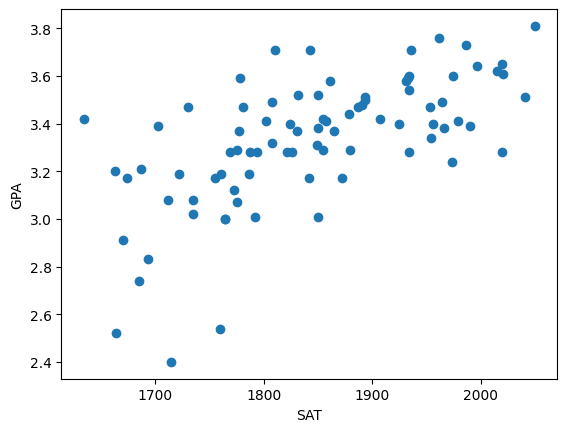

In [ ]:
#Generamos los conjuntos de X y
x = data ['SAT']
y = data ['GPA']

#Graficamos los datos
plt.scatter(x,y)
plt.xlabel('SAT')
plt.ylabel('GPA')

### Paso 2: Construir un modelo de regresión lineal usando Statsmodels

[StatsModels:](https://www.statsmodels.org/stable/index.html) es un modulo que provee clases y funciones para:

*   Explorar estadísticas en los datos
*   Estimar modelos estadísticos


In [ ]:
x_datos = sm.add_constant(x)
modelo_stat = sm.OLS(y,x).fit()
modelo_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                   9.38e-102
Time:                        22:06:33   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'GPA')

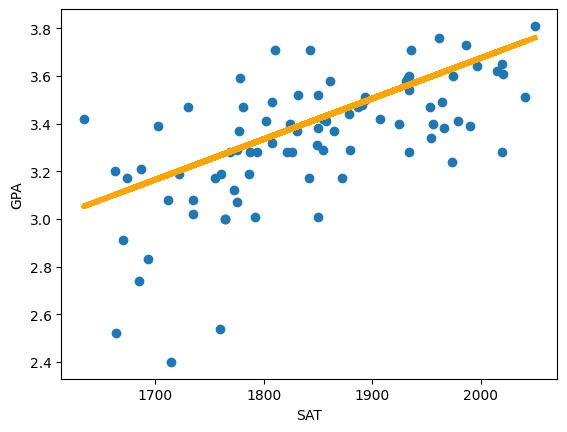

In [ ]:
#Graficando los datos
plt.scatter(x,y)
yhat = 0.0017*x + 0.275
fig = plt.plot(x,yhat, lw=4, c='orange', label ='Regresión lineal')

plt.xlabel('SAT')
plt.ylabel('GPA')

## Ejercicio 2: regresión logística

### Paso 1: carga de datos

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/2024_DiplomadoIA/Data/Datos_antropometricos.csv"
data = pd.read_csv(path)
data.describe()

,Gender,Height,Weight
count,10000.000000,10000.000000,10000.000000
mean,0.500000,66.367560,161.440357
std,0.500025,3.847528,32.108439
min,0.000000,54.263133,64.700127
25%,0.000000,63.505620,135.818051
50%,0.500000,66.318070,161.212928
75%,1.000000,69.174262,187.169525
max,1.000000,78.998742,269.989698


Text(0, 0.5, 'Weight (lbs)')

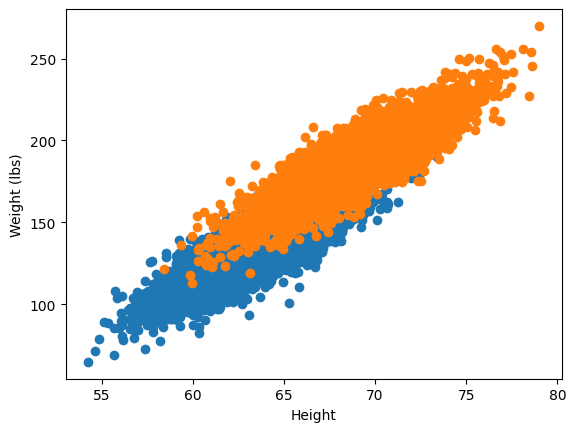

In [ ]:
#Generamos los conjuntos de X y
x = data [['Height', 'Weight']]
y = data ['Gender']

#Graficamos los datos
women = x[(data.Gender==1)]
men = x[(data.Gender==0)]

plt.scatter(women.Height,women.Weight)
plt.scatter(men.Height,men.Weight)
plt.xlabel('Height')
plt.ylabel('Weight (lbs)')

### Paso 2: Construir un modelo de regresión logística con Sklearn

In [ ]:
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg') #instanciando el modelo
modelo = clf.fit(x, y) #entrenamiento

print("Theta_0: ", modelo.intercept_ )
print("For theta_1 and theta_2: ", modelo.coef_ )

Theta_0:  [-0.69254177]
For theta_1 and theta_2:  [[ 0.49261999 -0.19834042]]


In [ ]:
# Predecir el sexo de una persona de acuerdo a su peso y estatura
y_pred = modelo.predict([(80,170)])
print("Clase predicha: ", y_pred)

Clase predicha:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
